# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [50]:
# Membaca dataset
df = pd.read_csv('https://raw.githubusercontent.com/mhmmdriz/bmlp-submission/refs/heads/main/Dataset_clustering.csv')
df.head()

,age,bmi,children,charges,sex,smoker,region,label
0,19,27.900,0,16884.92400,female,yes,southwest,Moderate-Risk Clients
1,18,33.770,1,1725.55230,male,no,southeast,Low-Risk Clients
2,28,33.000,3,4449.46200,male,no,southeast,Low-Risk Clients
3,33,22.705,0,21984.47061,male,no,northwest,High-Risk Clients
4,32,28.880,0,3866.85520,male,no,northwest,Low-Risk Clients


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   bmi       1190 non-null   float64
 2   children  1190 non-null   int64  
 3   charges   1190 non-null   float64
 4   sex       1190 non-null   object 
 5   smoker    1190 non-null   object 
 6   region    1190 non-null   object 
 7   label     1190 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 74.5+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [52]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [53]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["sex", "smoker", "region"]

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cat = encoder.fit_transform(df[categorical_columns])

# Buat DataFrame dari hasil encoding dengan indeks yang sama
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns), index=df.index)

# Gabungkan dengan dataframe asli
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [54]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['label'])
y = df_encoded['label']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(952, 9), y_train=(952,)
Test set shape: X_test=(238, 9), y_test=(238,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [55]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [56]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    num_classes = cm.shape[0]

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.861345   0.860714  0.861345  0.859957
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.949580   0.949971  0.949580  0.949381
4              Naive Bayes (NB)  0.726891   0.808369  0.726891  0.689300


Berdasarkan hasil evaluasi di atas, dapat diketahui bahwa model terbaik adalah Decision Tree dan Random Forest, karena mencapai nilai 100% pada semua metrik evaluasi diatas. Kemudian, model SVM dan KNN juga memiliki performa yang cukup baik, walau tidak setinggi Decision Tree dan Random Forest. Terakhir, disini model Naive Bayes yang memiliki performa yang kurang baik.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Pada bagian ini, dibuat diagram learning curve untuk melihat apakah model overfitting atau tidak.

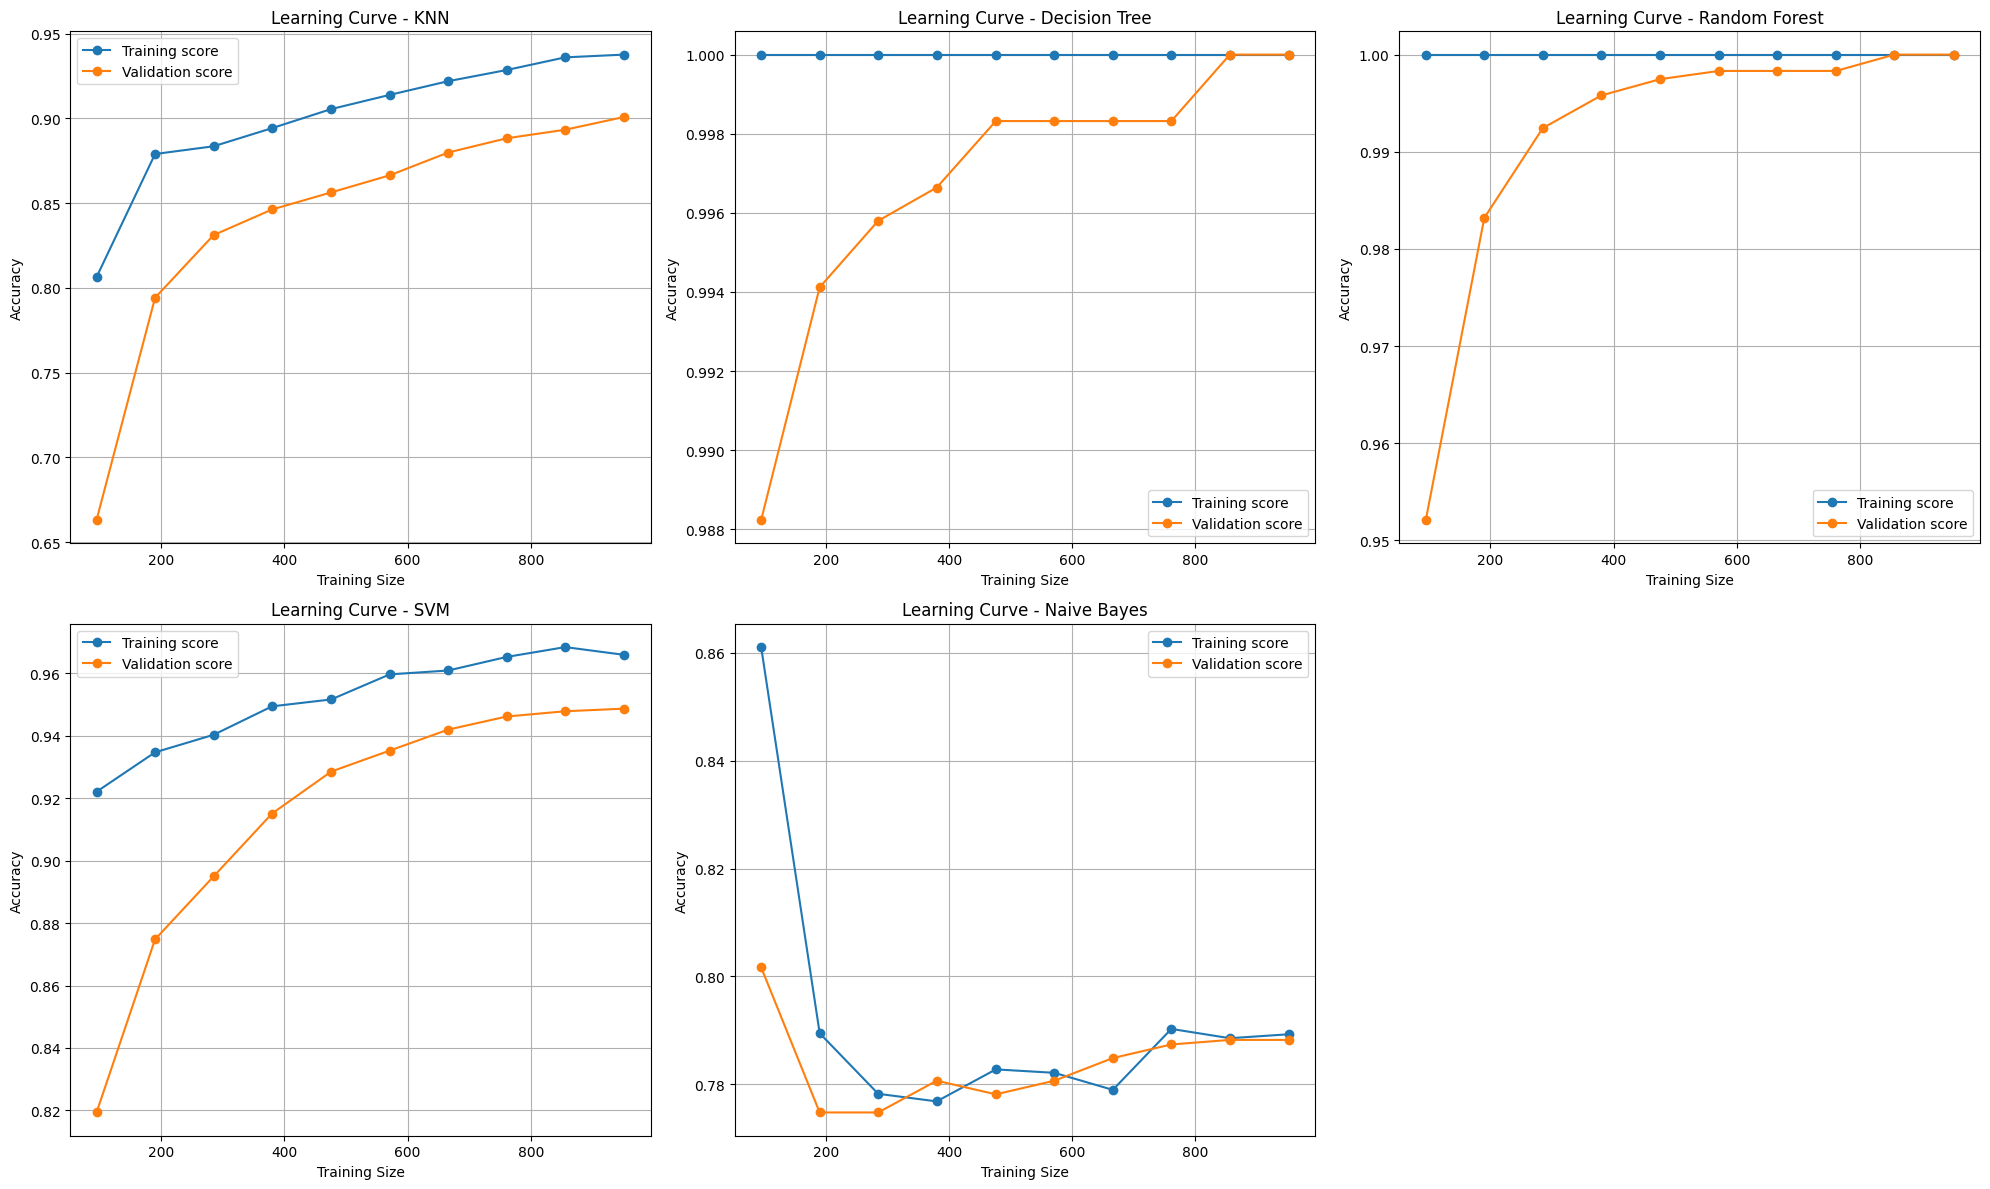

In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Daftar model
models = {
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svm,
    'Naive Bayes': nb
}

plt.figure(figsize=(20, 12))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    # Hitung rata-rata dan standar deviasi
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation score')
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()


Dari learning curve diatas dapat diambil kesimpulan bahwa:
1. Model KNN sedikit overfitting namun masih dalam batas wajar, karena terdapat gap yang cukup konsisten, walau tidak terlalu besar. Sehingga model ini masih cukup baik untuk digunakan.
2. Model Decision Tree diindikasikan overfitting, karena terdapat gap. Walaupun validation scorenya tinggi, namun karena validation score juga tinggi (~1.0), model bisa dibilang bekerja baik untuk dataset ini, tapi bisa jadi buruk di data nyata.
3. Model Random Forest Training dan validation scorenya mendekati 1.0 dan sangat rapat. Tidak ada overfitting yang signifikan karena gap kecil. Random Forest mengurangi overfitting dari Decision Tree karena teknik ensemble. Sehingga model ini sangat baik.
4. Training score dan validation score tinggi dan dekat satu sama lain. Ini menunjukkan model tidak overfitting dan tidak underfitting. Sehingga, model ini juga sangat baik dan generalisasi bagus.
5. Training score rendah dan turun drastis saat ukuran training bertambah. Validation score juga rendah dan tidak meningkat banyak. Gap kecil, tapi karena kedua nilai rendah, jadi bisa dianggap underfitting. Oleh karena itu, model ini kurang cocok untuk dataset ini, performanya paling rendah.